In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Generate some example data
num_users = 1000
num_products = 500
min_reviews_per_user = 1
max_reviews_per_user = 20

np.random.seed(42)
user_ids = [f"user{str(i).zfill(1)}" for i in range(1, num_users + 1)]

# Generate gender distribution: 55% male, 45% female
gender_distribution = np.random.choice(['Male', 'Female'], size=num_users, p=[0.55, 0.45])

# Assign genders to users
user_genders = np.random.choice(gender_distribution, size=num_users)

# Ensure consistent genders for users
user_gender_mapping = dict(zip(user_ids, user_genders))
user_genders = [user_gender_mapping[user_id] for user_id in user_ids]

# Generate unique ages for users between 18 and 60
user_ages = np.random.choice(range(18, 60), size=num_users, replace=True)

# Create a dictionary to map user IDs to ages
user_age_mapping = dict(zip(user_ids, user_ages))
user_ages = [user_age_mapping[user_id] for user_id in user_ids]

data = []

for user_id in user_ids:
    num_reviews = np.random.randint(min_reviews_per_user, max_reviews_per_user + 1)
    user_product_ids = np.random.choice(range(1, num_products + 1), size=num_reviews, replace=False)
    user_interaction_strengths = np.random.choice([1, 2, 3, 4, 5], size=num_reviews, p=[0.20, 0.05, 0.15, 0.25, 0.35])

    for product_id, interaction_strength in zip(user_product_ids, user_interaction_strengths):
        data.append({
            'user_id': user_id,
            'gender': user_gender_mapping[user_id],
            'age': user_ages[user_ids.index(user_id)],
            'product_id': product_id,
            'interaction_strength': interaction_strength
        })

df = pd.DataFrame(data)

# Sort the data by user_id
df = df.sort_values(by='user_id')

# Save the generated dataset to a CSV file
# df.to_csv('recommendation_dataset.csv', index=False)


In [36]:
df.head(5)

,user_id,gender,age,product_id,interaction_strength
0,user1,Female,33,74,5
1,user1,Female,33,33,4
2,user1,Female,33,309,3
3,user1,Female,33,58,5
4,user1,Female,33,282,5


In [37]:
df["gender"].value_counts()

Male      5871
Female    4451
Name: gender, dtype: int64

In [38]:
df['interaction_strength'].describe()

count    10322.000000
mean         3.493412
std          1.501027
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: interaction_strength, dtype: float64

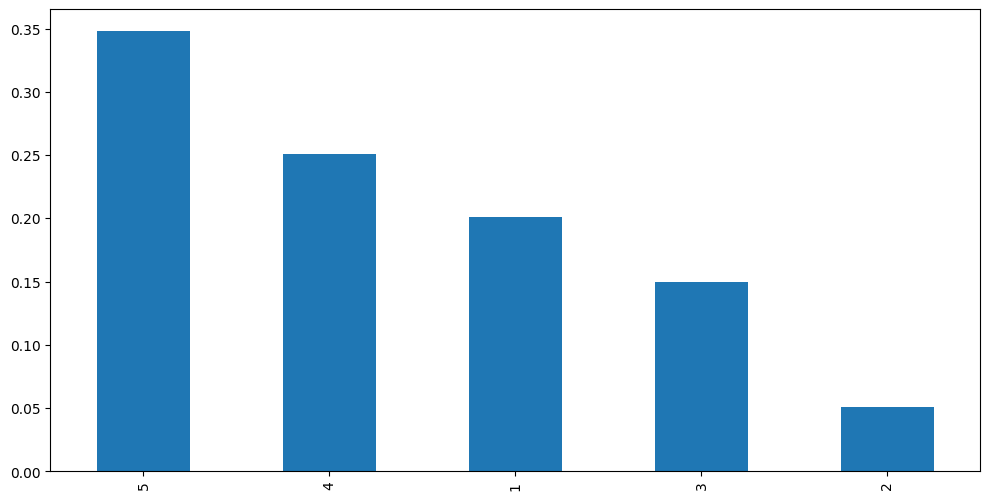

In [39]:
plt.figure(figsize = (12, 6))
df['interaction_strength'].value_counts(1).plot(kind='bar')
plt.show()

In [40]:
df.isna().sum()

user_id                 0
gender                  0
age                     0
product_id              0
interaction_strength    0
dtype: int64

In [41]:
top_users = df.groupby('user_id').size().sort_values(ascending = False)[:10]
top_users

user_id
user165    20
user319    20
user250    20
user859    20
user593    20
user471    20
user124    20
user334    20
user797    20
user329    20
dtype: int64

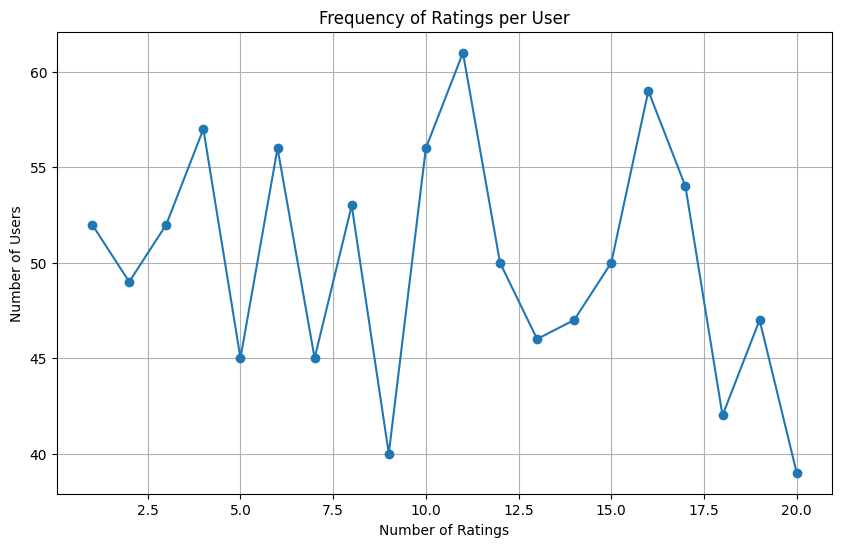

In [42]:
# Calculate the frequency of ratings per user
ratings_per_user = df.groupby('user_id')['interaction_strength'].count()

# Calculate the frequency of users having a specific number of ratings
ratings_frequency = ratings_per_user.value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ratings_frequency.index, ratings_frequency.values, marker='o')
plt.title('Frequency of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

In [43]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts>=10].index)]
df_final.columns

Index(['user_id', 'gender', 'age', 'product_id', 'interaction_strength'], dtype='object')

In [44]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['product_id'].nunique())

The number of observations in the final data = 8128
Number of unique USERS in the final data =  551
Number of unique PRODUCTS in the final data =  500


In [45]:
interactions_matrix = df_final.pivot(index = 'user_id', columns = 'product_id', values = 'interaction_strength').fillna(0)
print('Shape of interactions_matrix:', interactions_matrix.shape)
interactions_matrix.head()

Shape of interactions_matrix: (551, 500)


product_id,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
user_id,,,,,,,,,,,,,,,,,,,,,
user10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
num_of_interactions = np.count_nonzero(interactions_matrix)
print('Given interactions = ', num_of_interactions)

Given interactions =  8128


In [47]:
density = (num_of_interactions/(interactions_matrix.shape[0] * interactions_matrix.shape[1]))
density *= 100
print ('density: {:4.2f}%'.format(density))

density: 2.95%


In [48]:
# @title RANK BASED RECOMMENDATION SYSTEM

In [49]:
#Calculate the average rating for each product
average_rating = df_final.groupby('product_id').mean()['interaction_strength']

#Calculate the count of ratings for each product
count_rating = df_final.groupby('product_id').count()['interaction_strength']

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

<ipython-input-49-942c8410bf32>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating = df_final.groupby('product_id').mean()['interaction_strength']


,avg_rating,rating_count
product_id,,
344,4.400000,10
184,4.375000,16
383,4.375000,16
239,4.285714,14
52,4.277778,18


In [50]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]

In [51]:
list(top_n_products(final_rating, 10, 10))

[184, 383, 239, 52, 475, 231, 245, 260, 478, 25]

In [52]:
# @title COLLABORATIVE FILTERING BASED RECOMMENDATION SYSTEM
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
# Products' based collaborative filtering

prodcut_similarity = cosine_similarity(interactions_matrix.T)

def get_similar_products(product_id, num_similar=5):
    product_index = interactions_matrix.columns.get_loc(product_id)
    similar_products = np.argsort(prodcut_similarity[product_index])[::-1][1:num_similar+1]
    return interactions_matrix.columns[similar_products]

# for product with id 20
product_to_recommend_for = 20
similar_products = get_similar_products(product_to_recommend_for)

print(f"Products similar to '{product_to_recommend_for}': {similar_products}")

Products similar to '20': Int64Index([435, 197, 174, 176, 90], dtype='int64', name='product_id')


In [54]:
interactions_matrix['user_index'] = np.arange(0, interactions_matrix.shape[0])
interactions_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
interactions_matrix.head()


product_id,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows

        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

In [56]:
similar = similar_users(3,interactions_matrix)[0][0:10]
similar

[220, 458, 47, 203, 442, 475, 215, 266, 491, 324]

In [57]:
# @title MODEL BASED COLLABORATIVE FILTERING BASED RECOMMENDATION SYSTEM
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

In [58]:
sparse_interactions_matrix = csr_matrix(interactions_matrix.values)

In [59]:
U, S, VT = svds(sparse_interactions_matrix, k = 50)
sigma = np.diag(S)

print(U.shape)
print(sigma.shape)
print(VT.shape)

(551, 50)
(50, 50)
(50, 500)


In [60]:
predicted_interactions = np.dot(np.dot(U, sigma), VT)

# Predicted ratings
predicted_df = pd.DataFrame(abs(predicted_interactions), columns = interactions_matrix.columns)
predicted_df.head()
predicted_matrix = csr_matrix(predicted_df.values)

In [61]:
def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):

    # Get the user's ratings from the actual and predicted interaction matrices
    user_interactions = interactions_matrix[user_index,:].toarray().reshape(-1)
    user_predictions = predicted_matrix[user_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    df_predictions = pd.DataFrame({'user_interactions': user_interactions, 'user_predictions': user_predictions})
    df_predictions['Recommended Products'] = np.arange(len(user_interactions))
    df_predictions = df_predictions.set_index('Recommended Products')

    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    df_predictions = df_predictions.loc[df_predictions.user_interactions == 0]

    #Recommending products with top predicted ratings
    df_predictions = df_predictions.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(df_predictions['user_predictions'].head(num_recommendations))

In [62]:
#Enter 'user index' and 'num_recommendations' for the user
recommend_items(12, sparse_interactions_matrix, predicted_matrix, 5)


Below are the recommended products for user(user_id = 12):

Recommended Products
68     1.108737
94     1.058670
180    1.039177
281    1.032578
453    0.978680
Name: user_predictions, dtype: float64


In [63]:
# @title EVALUATIONG THE MODEL
from sklearn.metrics import mean_squared_error

In [64]:
average_rating = interactions_matrix.mean()
average_rating.head()

product_id
1    0.134301
2    0.117967
3    0.123412
4    0.119782
5    0.096189
dtype: float64

In [65]:
predicted_df.head()

product_id,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
0,0.241355,0.163900,0.313177,0.149103,0.093131,0.155648,0.119877,0.118345,0.117707,0.193076,...,0.111969,0.243990,0.246499,0.303336,0.067451,0.057321,0.065384,0.034468,0.135311,0.198195
1,0.329398,0.136627,0.593056,0.535366,0.183055,0.033172,0.129059,0.013095,0.047800,0.297071,...,0.300412,0.120128,0.525862,0.202006,0.124813,0.039917,0.085279,0.230907,0.170815,0.025420
2,0.435087,0.021758,0.456962,0.356925,0.255506,0.283504,0.037537,0.087880,0.057208,0.416223,...,0.268025,0.113652,0.035605,0.351284,0.119501,0.195585,0.217023,0.241344,0.255509,0.062683
3,0.289189,0.174239,0.139438,0.008688,0.056192,0.331317,0.057990,0.116146,0.181970,0.156921,...,0.097872,0.016781,0.213002,0.253241,0.159702,0.011699,0.041948,0.177654,0.283041,0.210803
4,0.397341,0.123523,0.233522,0.666545,0.309852,0.128705,0.335621,0.071538,0.014715,0.624158,...,0.069748,0.132987,0.599772,0.137799,0.260211,0.304937,0.151979,0.142784,0.631144,0.269835


In [66]:
average_predictions=predicted_df.mean()
average_predictions.head()

product_id
1    0.340008
2    0.261315
3    0.287365
4    0.323156
5    0.230182
dtype: float64

In [67]:
rmse_df = pd.concat([average_rating, average_predictions], axis=1)
rmse_df.columns = ['Average_actual_ratings', 'Average_predicted_ratings']
rmse_df.head()

,Average_actual_ratings,Average_predicted_ratings
product_id,,
1,0.134301,0.340008
2,0.117967,0.261315
3,0.123412,0.287365
4,0.119782,0.323156
5,0.096189,0.230182


In [69]:
RMSE=mean_squared_error(rmse_df['Average_actual_ratings'], rmse_df['Average_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.15032417169094453 



In [70]:
# @title THANK YOU!